In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.gridspec as Gridspec
plt.style.use('./util/matplotlib_stylesheet.mplstyle')

In [3]:
import numpy as np
import pandas as pd
from random import sample, choices
import random

In [4]:
from backtest.strategy import CarbonAwareStrategy

In [5]:
CLIENTS_BY_ROUND = 10
TOTAL_CLIENTS = 20
MAX_DURATION_FORECAST = 12
LOCATIONS = ['westcentralus', 'ukwest', 'uksouth', 'westeurope', 'westus', 'australiacentral', 'australiaeast', 'swedencentral', 'norwaywest', 'norwayeast', 'northeurope', 'centralus', 'francesouth', 'francecentral']


In [6]:
strategy = CarbonAwareStrategy(clients_per_round=CLIENTS_BY_ROUND, max_forecast_duration=MAX_DURATION_FORECAST)

**Generate random sine wave sample data**

**FORECASTS**

In [7]:
def get_random_forecast(locations):
    N_DATAPOINTS = 100
    DATAPOINTS = np.linspace(0, MAX_DURATION_FORECAST, N_DATAPOINTS)
    mesh = np.meshgrid(DATAPOINTS, np.arange(0, len(locations), 1))[0]
    x_offset = np.random.random((len(locations), 1)) * 10
    y_scale = np.random.random((len(locations), 1)) * 250
    slope = np.random.random((len(locations), 1)) * 1
    y_offset = np.random.random((len(locations), 1)) * 500
    wavelength = np.random.random((len(locations), 1))
    noise_strength = np.random.random((len(locations), 1)) * 250
    noise = np.random.random((len(locations), N_DATAPOINTS)) * noise_strength
    bias = np.linspace(0, 1000, len(locations))
    bias[[2, 5, 7, 8, 0, 12]] = 0
    bias = bias.reshape(len(locations), 1)

    sample_forecasts_data = bias + ((np.sin((mesh*wavelength) + x_offset) * y_scale) + ((mesh*slope)+y_offset)) + noise
    sample_forecasts_data = sample_forecasts_data.clip(min=0)

    forecasts = {locations[i]: sample_forecasts_data[i].tolist() for i, data in enumerate(sample_forecasts_data)}
    return forecasts

In [8]:
forecasts = get_random_forecast(LOCATIONS)

In [9]:
forecasts

{'westcentralus': [571.9955032797927,
  564.0800832014047,
  626.6512926224829,
  500.34548139745726,
  583.1672909903062,
  523.5032115359379,
  590.1545761609539,
  644.4911688404873,
  644.8547956016457,
  531.5067964898691,
  623.8190186189518,
  552.4140460101105,
  528.1180501201862,
  626.1614767619678,
  585.2203863277864,
  527.5451439036731,
  568.8105982562759,
  605.1270662001729,
  537.6400149471086,
  614.807532739701,
  525.4090681261985,
  654.9492412857021,
  515.113939544,
  538.9326168631419,
  608.0972230515873,
  643.640031628377,
  560.0715693529646,
  593.8763512888693,
  609.3546210146935,
  646.0988901024249,
  625.490706455526,
  594.3241513933034,
  613.7988343217999,
  569.859445471087,
  542.2566628253203,
  531.847590940738,
  649.7377318960883,
  594.1396569749925,
  534.9012151174467,
  633.9750625767894,
  564.2603612032259,
  553.6235135214413,
  547.2312440957913,
  544.0031176114202,
  660.7873813644601,
  555.3001254307786,
  583.6253592031477,
  54

**CLIENTS LOCATIONS**

In [10]:
client_locations = {'client_'+str(i): LOCATIONS[int(random.random() * len(LOCATIONS))] for i in range(TOTAL_CLIENTS)}
client_locations

{'client_0': 'francecentral',
 'client_1': 'ukwest',
 'client_2': 'australiaeast',
 'client_3': 'francesouth',
 'client_4': 'westcentralus',
 'client_5': 'centralus',
 'client_6': 'swedencentral',
 'client_7': 'australiaeast',
 'client_8': 'norwayeast',
 'client_9': 'westus',
 'client_10': 'westeurope',
 'client_11': 'francecentral',
 'client_12': 'norwayeast',
 'client_13': 'westeurope',
 'client_14': 'australiaeast',
 'client_15': 'northeurope',
 'client_16': 'australiaeast',
 'client_17': 'ukwest',
 'client_18': 'uksouth',
 'client_19': 'francesouth'}

**PAST PARTICIPIATION**

In [11]:
# client_participation = np.random.randint(low=0, high=5, size=(TOTAL_CLIENTS))
client_participation = np.zeros(TOTAL_CLIENTS)

In [12]:
client_participation_dict = {key:value for key,value in zip(list(client_locations.keys()), client_participation)}

In [13]:
selected_clients = strategy.select(forecasts=forecasts, past_participation=client_participation_dict, client_location_map=client_locations)

In [14]:
selected_clients

['client_5',
 'client_19',
 'client_3',
 'client_17',
 'client_1',
 'client_9',
 'client_11',
 'client_0',
 'client_7',
 'client_14']

## Quick test simulation

<AxesSubplot: xlabel='clients'>

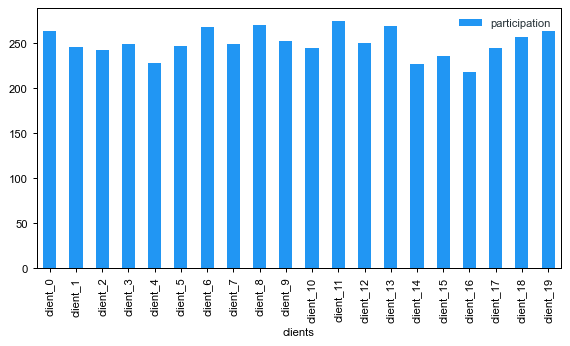

In [15]:
client_participation = np.zeros(TOTAL_CLIENTS)
client_participation_dict = {key:value for key,value in zip(list(client_locations.keys()), client_participation)}
init_participation = client_participation_dict

df_partcipation = pd.DataFrame({
    'clients': list(client_locations.keys()),
    'participation': np.zeros(TOTAL_CLIENTS)
}).set_index('clients')

for i_round in range(500):
    selected_clients = strategy.select(forecasts=get_random_forecast(LOCATIONS), past_participation=client_participation_dict, client_location_map=client_locations)

    df_partcipation.loc[selected_clients] += 1

df_partcipation.plot.bar()

In [16]:
253.0 in list(df_partcipation['participation'])

False

In [59]:
client_participation = pd.DataFrame({'cid': ['08',], 'participation': [0,]})

In [60]:
client_participation = pd.concat([client_participation, pd.DataFrame({'cid': ['01',], 'participation': [0,]})]).reset_index(drop=True)
client_participation = pd.concat([client_participation, pd.DataFrame({'cid': ['02',], 'participation': [0,]})]).reset_index(drop=True)
client_participation = pd.concat([client_participation, pd.DataFrame({'cid': ['03',], 'participation': [0,]})]).reset_index(drop=True)
client_participation = pd.concat([client_participation, pd.DataFrame({'cid': ['04',], 'participation': [0,]})]).reset_index(drop=True)
client_participation

,cid,participation
0,08,0
1,01,0
2,02,0
3,03,0
4,04,0


In [73]:
client_participation.loc[(client_participation['cid'].isin(['02', '03']), 'participation')] = client_participation.loc[(client_participation['cid'].isin(['02', '03']), 'participation')] + 100

In [74]:
client_participation

,cid,participation
0,08,0
1,01,0
2,02,203
3,03,203
4,04,0


In [19]:
participation = {client['cid']: client['participation'] for i, client in client_participation.iterrows()}

In [20]:
pd.Series(participation.keys()).unique()

array(['01', '02', '03', '04'], dtype=object)

In [21]:
for i, row in client_participation.iterrows():
    print(row['cid'])

01
01
02
03
04


In [22]:
client_participation

,cid,participation
0,01,1
1,01,8
2,02,10
3,03,7
4,04,9


In [23]:
participation

{'01': 8, '02': 10, '03': 7, '04': 9}

In [24]:
client_participation.append([{'cid':'01', 'participation': 0}])
client_participation.append([{'cid':'02', 'participation': 1}])
client_participation.append([{'cid':'03', 'participation': 2}])

C:\Users\skype\AppData\Local\Temp\ipykernel_23764\1184131695.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  client_participation.append([{'cid':'01', 'participation': 0}])
C:\Users\skype\AppData\Local\Temp\ipykernel_23764\1184131695.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  client_participation.append([{'cid':'02', 'participation': 1}])
C:\Users\skype\AppData\Local\Temp\ipykernel_23764\1184131695.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  client_participation.append([{'cid':'03', 'participation': 2}])


,cid,participation
0,01,1
1,01,8
2,02,10
3,03,7
4,04,9
0,03,2


In [25]:
client_participation

,cid,participation
0,01,1
1,01,8
2,02,10
3,03,7
4,04,9
